get a list of words used for each part of type to be used in [word cloud](https://www.wordclouds.com/) for presentation

like word cloud 'E' of all words used by Extroverts versus word cloud 'I'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
mbti = pd.read_csv('data/train.csv')

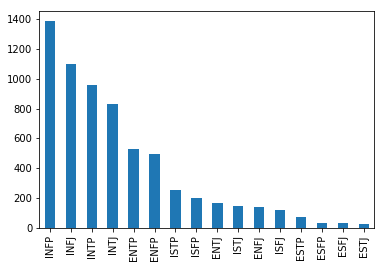

In [5]:
mbti['type'].value_counts().plot(kind = 'bar')


In [6]:

all_mbti = []
for i, row in mbti.iterrows():
    for post in row['posts'].split('|||'):
        all_mbti.append([row['type'], post])
all_mbti = pd.DataFrame(all_mbti, columns=['type', 'post'])

In [7]:
print(f"before:  {mbti.shape} \nafter: {all_mbti.shape}")

before:  (6506, 2) 
after: (316548, 2)


In [115]:
mbti_type = pd.concat([mbti['type'].value_counts().to_frame(name='before'), all_mbti['type'].value_counts().to_frame(name='after')],axis=1)
mbti_type


,before,after
ENFJ,143,6947
ENFP,496,23925
ENTJ,167,8174
ENTP,530,26017
ESFJ,35,1668
ESFP,36,1663
ESTJ,30,1495
ESTP,71,3437
INFJ,1100,53807
INFP,1386,67846


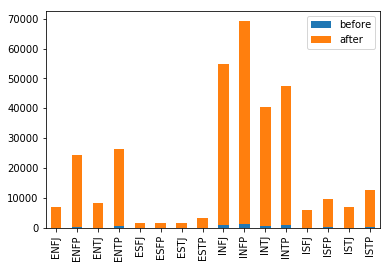

In [120]:
mbti_type.plot.bar(stacked=True)

It's easier to do binary classification than 16 class (multi-class) classification.

In [9]:
def split_type(row):
    ''' 
       Split MBTI type into individual features for Binary Classification
       eg ENFP = [0 1 0 0]
    '''
    t = row['type']
    I,N,T,J = 0,0,0,0
    
    I = 1 if t[0] =='I' else 0
    
    N = 1 if t[1] == 'N' else 0
    
    T = 1 if t[2] == 'T' else 0
    
    J = 1 if t[3] == 'J' else 0
    
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

In [10]:
all_mbti = all_mbti.join(all_mbti.apply(lambda row: split_type(row), axis=1))
all_mbti.head(5)

,type,post,IE,JP,NS,TF
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw,1,1,1,0
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,1,1,1,0
2,INFJ,enfp and intj moments https://www.youtube.com...,1,1,1,0
3,INFJ,What has been the most life-changing experienc...,1,1,1,0
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,1,1,1,0


In [11]:
# rearrange columns
all_mbti = all_mbti[['type', 'IE', 'NS', 'TF', 'JP', 'post']]
all_mbti.head(5)

,type,IE,NS,TF,JP,post
0,INFJ,1,1,0,1,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,INFJ,1,1,0,1,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,INFJ,1,1,0,1,enfp and intj moments https://www.youtube.com...
3,INFJ,1,1,0,1,What has been the most life-changing experienc...
4,INFJ,1,1,0,1,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...


In [128]:
print ("Introversion (I) -     Extroversion (E):\t")
print("\t", all_mbti['IE'].value_counts()[0], "  -     ", all_mbti['IE'].value_counts()[1])
print ("Intuition (N)    -     Sensing (S):\t\t")
print("\t", all_mbti['NS'].value_counts()[0], "  -     ", all_mbti['NS'].value_counts()[1])
print ("Thinking (T)     -     Feeling (F):\t\t")
print("\t", all_mbti['TF'].value_counts()[0], " -      ", all_mbti['TF'].value_counts()[1])
print ("Judging (J)      -     Perceiving (P):\t\t")
print("\t", all_mbti['JP'].value_counts()[0], " -      ", all_mbti['JP'].value_counts()[1])

Introversion (I) -     Extroversion (E):	
	 73326   -      243222
Intuition (N)    -     Sensing (S):		
	 43419   -      273129
Thinking (T)     -     Feeling (F):		
	 171428  -       145120
Judging (J)      -     Perceiving (P):		
	 191612  -       124936


### Stop Words

In [114]:
my_stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren',
"aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can',
'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't",
'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't",
'have', 'haven', "haven't", 'having',  'how', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its',
'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'needn',
"needn't", 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't",
'she', "she's", 'should', "should've",'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'then',
'there', 'these', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we',
'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'won', "won't",
'wouldn', "wouldn't", 'y','ISTJ', 'ISFJ', 'INFJ', 'INTJ', 'ISTP', 'ISFP', 'INFP', 'INTP', 'ESTP', 'ESFP', 'ENFP', 'ENTP', 'ESTJ',
'ESFJ', 'ENFJ', 'ENTJ']
print("Number of stop words: {}".format(len(my_stopwords)))

Number of stop words: 164


In [105]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS 
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))

Number of stop words: 318


In [106]:
print(ENGLISH_STOP_WORDS)

frozenset({'somehow', 'too', 'namely', 'around', 'during', 'most', 'or', 'beforehand', 'part', 'four', 'he', 'an', 'our', 'again', 'becomes', 'everything', 'go', 'becoming', 'fifteen', 'hasnt', 'nobody', 'about', 'not', 'hence', 'alone', 'my', 'myself', 'his', 'whereafter', 'latterly', 'etc', 'inc', 'if', 'mill', 'herself', 'describe', 'due', 'then', 'whence', 'whereby', 'six', 'became', 'twelve', 'beyond', 'be', 'con', 'interest', 'when', 'at', 'eleven', 'detail', 'twenty', 'serious', 'well', 'therein', 'cry', 'three', 'every', 'are', 'what', 'herein', 'moreover', 'i', 'become', 'no', 'same', 'whom', 'how', 'nowhere', 'two', 'any', 'name', 'made', 'among', 'ever', 'down', 'everywhere', 'many', 'noone', 'out', 'thence', 'eight', 'yours', 'there', 'further', 'eg', 'throughout', 'since', 'their', 'himself', 'sixty', 'find', 'who', 'do', 'between', 'them', 'would', 'via', 'front', 'being', 'first', 'perhaps', 'within', 'bottom', 'yourselves', 'afterwards', 'take', 'its', 'ie', 'never', 'y

### Training

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [107]:
X_train, X_test, y_train, y_test = train_test_split(all_mbti['post'], all_mbti['IE'], test_size=0.3, 
                                                    random_state=42)

### LinearSVC
LinearSVC with the parameter: `class_weight='balanced'` will penalize incorrect predictions and help with training on imbalanced dataset

In [102]:
svc_pipe = Pipeline([('count_vec', CountVectorizer(binary=True, min_df=3, ngram_range=(1,2), stop_words=my_stopwords)),
                      ('svc', LinearSVC(class_weight='balanced')) # penalize 
                    ])

In [103]:
%%time
svc_pipe.fit(X_train, y_train)

CPU times: user 1min 22s, sys: 837 ms, total: 1min 23s
Wall time: 1min 23s


Pipeline(memory=None,
     steps=[('count_vec', CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['a', '...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [104]:
print("Accuracy on training set: {:.3f}".format(post_pipe.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(post_pipe.score(X_test, y_test)))

Accuracy on training set: 0.990
Accuracy on test set: 0.700


### Decision tree

Decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes.

In modern applied machine learning, tree ensembles (Random Forests, Gradient Boosted Trees, etc.) almost always outperform singular decision trees

In [35]:
post_pipe = Pipeline([('count_vec', CountVectorizer(binary=True, min_df=3, ngram_range=(1,2), stop_words=my_stopwords)),
                      ('tree', DecisionTreeClassifier(random_state=0))# random state fixed used for tie breaking
                    ])

In [36]:
%%time
post_pipe.fit(X_train, y_train)

CPU times: user 21min 50s, sys: 7.92 s, total: 21min 58s
Wall time: 22min 23s


Pipeline(memory=None,
     steps=[('count_vec', CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['a', '...         min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))])

In [44]:
print("Accuracy on training set: {:.3f}".format(post_pipe.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(post_pipe.score(X_test, y_test)))

Accuracy on training set: 0.990
Accuracy on test set: 0.700


one is good, more is better. Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
forest_pipe = Pipeline([('count_vec', CountVectorizer(binary=True, min_df=3, ngram_range=(1,2), stop_words=ENGLISH_STOP_WORDS)),
                      ('forest', RandomForestClassifier(n_estimators=5, random_state=2))
                    ])

In [112]:
%%time
forest_pipe.fit(X_test, y_test)

CPU times: user 46.1 s, sys: 510 ms, total: 46.6 s
Wall time: 47.5 s


Pipeline(memory=None,
     steps=[('count_vec', CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=frozens..._estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False))])

In [113]:
print("Accuracy on training set: {:.3f}".format(forest_pipe.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest_pipe.score(X_test, y_test)))

Accuracy on training set: 0.732
Accuracy on test set: 0.954


In [70]:
y_pred = forest_pipe.predict(X_test)
confusion_matrix(y_pred, y_test)

array([[ 1969,    20,     5,    12,     1,     3,     1,     1,    28,
           35,    26,    30,     6,     6,     8,     8],
       [    6,  6732,    19,    75,     7,     7,     3,     9,   112,
          138,    88,   125,    17,    24,    12,    36],
       [    1,     3,  2215,    13,     2,     2,     1,     1,    21,
           20,    18,    19,     4,     9,     4,     7],
       [    7,    35,    18,  7197,     8,     6,     9,    18,   130,
          149,   122,   146,    23,    36,    19,    46],
       [    0,     2,     0,     0,   415,     0,     0,     0,     4,
            4,     4,     4,     0,     0,     0,     1],
       [    0,     1,     1,     2,     0,   433,     1,     0,     2,
            2,     3,     1,     1,     0,     3,     1],
       [    0,     0,     0,     3,     1,     0,   410,     0,     1,
            2,     4,     6,     0,     1,     2,     1],
       [    0,     1,     0,     2,     0,     0,     0,   916,     9,
            9,     8,     

In [72]:
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

       ENFJ       0.91      0.91      0.91      2159
       ENFP       0.92      0.91      0.92      7410
       ENTJ       0.90      0.95      0.93      2340
       ENTP       0.92      0.90      0.91      7969
       ESFJ       0.89      0.96      0.92       434
       ESFP       0.88      0.96      0.92       451
       ESTJ       0.90      0.95      0.92       431
       ESTP       0.88      0.96      0.92       954
       INFJ       0.92      0.90      0.91     16669
       INFP       0.95      0.83      0.89     23007
       INTJ       0.89      0.94      0.91     11204
       INTP       0.88      0.94      0.91     12991
       ISFJ       0.82      0.96      0.89      1535
       ISFP       0.83      0.97      0.89      2428
       ISTJ       0.83      0.97      0.89      1806
       ISTP       0.83      0.97      0.89      3177

avg / total       0.91      0.90      0.90     94965



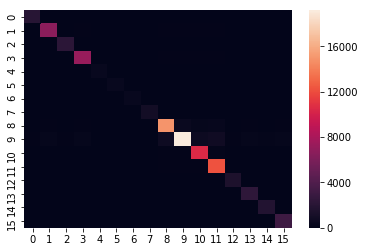

In [74]:
sns.heatmap(confusion_matrix(y_pred, y_test))

___
another ensemle model; Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
gbrt_pipe = Pipeline([('count_vec', CountVectorizer(binary=True, min_df=3, ngram_range=(1,2), stop_words=my_stopwords)),
                        ('gbrt', GradientBoostingClassifier(random_state=0))
                      ])

In [47]:
%%time
gbrt_pipe.fit(X_train, y_train)

CPU times: user 3min 10s, sys: 2.25 s, total: 3min 12s
Wall time: 3min 16s


Pipeline(memory=None,
     steps=[('count_vec', CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['a', '...         presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False))])

In [49]:
print("Accuracy on training set: {:.3f}".format(gbrt_pipe.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt_pipe.score(X_test, y_test)))

Accuracy on training set: 0.776
Accuracy on test set: 0.772


How do they measure up?

---
GridSearch to find best parameters of LinearSVM, LogisticRegression, DecisionTree and RandomForest

include tfidfvectorizer (True, False)

In [ ]:
from sklearn.grid_search import GridSearchCV

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print CV_rfc.best_params_

In [ ]:
parameters= {
    count_vec__binary = (False, True),
    count_vec__min_df = (1,2,3),
    count_vec__ngram_range = ((1,1),(1,2),(1,3)),
    count_vec__stop_words = (None, 'english', my_stopwords),
    
}